In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

### Optimization

In [1]:
from scipy.optimize import minimize

1. problem # 1: Minimize $$f(x)=(x-3)^2$$

In [8]:
def f(x):
    return (x-3)**2

res = minimize(f,x0=0)
print(res.x)

[2.99999998]


2. Problem #2: Minimize 
$$ f(x,y) = (x-1)^2 + (y-2.5)^2$$
subject to
$$ x-2y+2 \ge 0 $$
$$ -x-2y+6 \ge 0 $$
$$ -x+2y+2 \ge 0 $$
$$ x \ge 0 $$
$$ y \ge 0 $$

In [18]:
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2
print(f([1,2]))

cons = ({'type': 'ineq', 'fun': lambda x: x[0]-2*x[1]+2},
       {'type': 'ineq', 'fun': lambda x: -x[0]-2*x[1]+6},
       {'type': 'ineq', 'fun': lambda x: -x[0]+2*x[1]+2}
       )

bnds = ((0, None), (0, None))

res = minimize(f, x0=(2,0), bounds=bnds, constraints=cons)
res.x

0.25


array([1.4, 1.7])

### Interpolation
Suppose you have the following data:


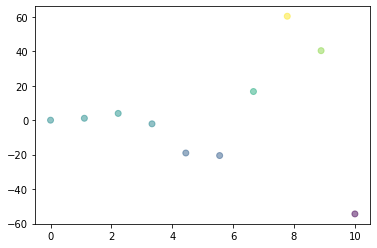

In [30]:
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)
plt.scatter(x,y,c=y, alpha=0.5, marker="o")

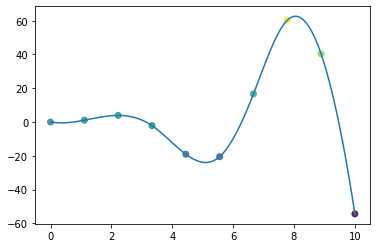

In [39]:
from scipy.interpolate import interp1d

f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)

plt.scatter(x,y,c=y, alpha=0.8, marker="o")
plt.plot(x_dense, y_dense)

### Curve Fitting
Trivial Example


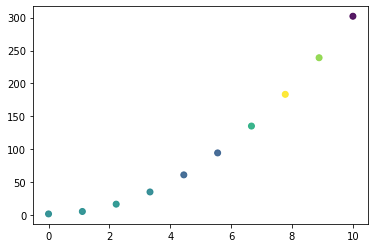

In [41]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2
plt.scatter(x_data, y_data, marker='o', alpha=0.9, c=y)

We want to fit a curve with $y=ax^2+b$ equation to the data. The goal is to determine the values of $a$ and $b$.

[3. 2.]


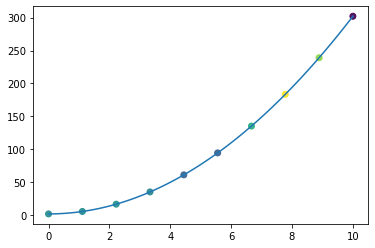

In [50]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b

popt, pcov = curve_fit(func, x_data, y_data)
# gives out the following:
# popt: Optimal values for the parameters so that the sum of the squared
        #residuals of ``f(xdata, *popt) - ydata`` is minimized
# pcov: The estimated covariance of popt.
print(popt)

x_dense = np.linspace(0, 10, 100)
y_dense = popt[0]*x_dense**2 + popt[1]

plt.scatter(x_data, y_data, marker='o', alpha=0.9, c=y)
plt.plot(x_dense, y_dense)

### Physics problem
The euqation for spring motion is $y(t) = A \cos(\omega t + \phi)$. We want to find the natural frequency of oscilaation $\omega$ for the spring. The collected data are as follows:

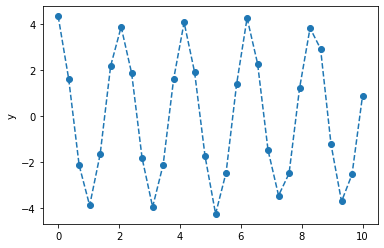

In [54]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

plt.plot(t_data, y_data, 'o--')
plt.ylabel('y')
plt.show()

Considering that $\omega = 2 \pi f, f=1/T$ (period) and $T\approx2$ seconds, looking at the plot above, we can initialize the model with the following: 
- $\omega = 2\pi(1/2) = \pi$
- $A=4 $
- $\phi=0$

[3.94836219 2.99899521 0.10411352]


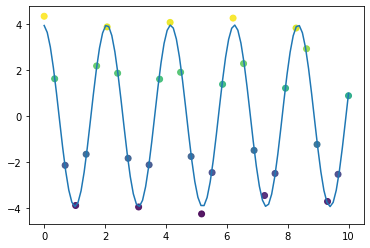

[0.05117448 0.00430857 0.02575701]


In [67]:
def func(x, A, w, phi):
    return A*np.cos(w*x+phi)

popt, pcov = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))  # in this example initialization is very important

print(popt)
t_dense = np.linspace(0, 10, 100)
y_dense =  popt[0]*np.cos(popt[1]*t_dense+popt[2])

plt.scatter(t_data, y_data, marker='o', alpha=0.9, c=y_data)
plt.plot(t_dense, y_dense)
plt.show()

# The estimation errors are:
print(np.sqrt(np.diag(pcov)))

## Special Functions
Legendre Polynomilas $P_l(x): $ satisfy $(1-x^2)y''-2xy' + l(l+1)y = 0$.
- The angular component of the spherical Schrodinger Equation which permits non-infinite solutions:

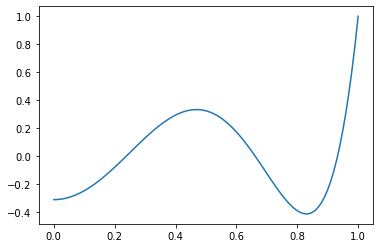

In [68]:
from scipy.special import legendre
x =  np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.show()

Bessel functions $J_{\alpha}: $ satisfy $x^2y'' + xy' + (x^2-\alpha^2)y = 0$
- Laplace's Equation in Polar coordinate system:

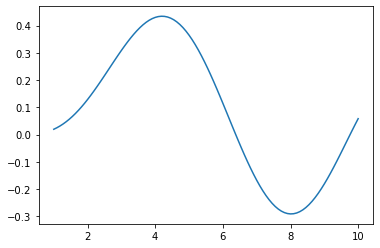

In [70]:
from scipy.special import jv
x = np.linspace(1, 10, 100)
plt.plot( x, jv(3,x))
plt.show()

## Calculus
### Differentiation

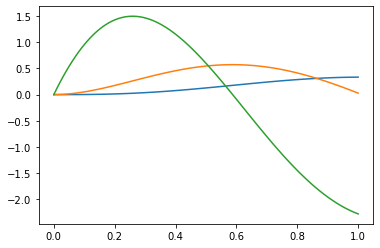

In [77]:
from scipy.misc import derivative
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))


plt.plot(x, derivative(f, x, dx=1e-6, n=1))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

### Integration
Single integrals
$$  \int_0^1 x^2 \sin(2x)\exp(-x)dx  $$

In [82]:
from scipy.integrate import quad
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral, integral_error = quad(integrand, 0, 1)
print(integral)
integral_error

0.10246777930717413


1.1376208786903388e-15

Double integrals:
$$  \int_0^1\int_{-x}^{x^2}\sin(x+y^2)dydx  $$

In [89]:
from scipy.integrate import dblquad
integrand = lambda x, y: np.sin(x+y**2)
lwr_y = lambda x: -x
upper_y = lambda x: x**2
integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upper_y )
print(integral)
integral_error

0.315802507240474


1.5634600713498928e-14

### N-dimensional integrals
Can be done similarly but using another scipy function

In [90]:
from scipy.integrate import nquad

## Differential Equations
First Order ODEs
Air friction while falling:
$$ \nu' -\alpha\nu^2 +\beta =0,~~~ \nu(0)=0$$

In [98]:
from scipy.integrate import odeint # solve_ivp

def dvdt(v, t):
    return 3*v**2 - 5
v0 = 0

t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v0, t)
# output: array containing the value of v for each desired time in t

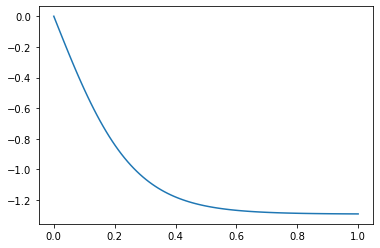

In [101]:
plt.plot(t, sol.T[0])

### Coupled first order ODEs
$$ y'_1 = y_1 + y^2_2 + 3x, ~~~ y_1(0)=0 $$
$$ y'_2 = 3y_1 + y^3_2 cos(x), ~~~ y_2(0)=0 $$

Letting $S=(y_1, y_2)$, we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$

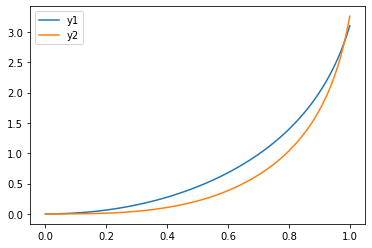

In [112]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 * np.cos(x)]

y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

plt.plot(x, sol.T[0], label='y1')
plt.plot(x, sol.T[1], label='y2')
plt.legend()

## Fourier Transform
The discrete Fourier transform is defined as
$$ y[k] = \sum_{n=1}^{N-1} \exp(-2\pi i n(k/N))x[n] $$
- $k/N$ represents a specific frequency (dimensionless)
- Can be converted to a frequency (Hz) if you know the spacing in x

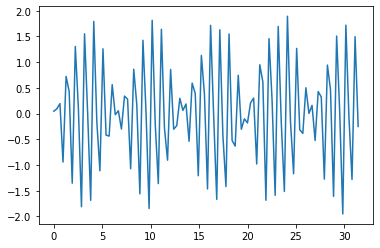

In [5]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*x) + np.sin(4*np.pi*x) + 0.1*np.random.randn(len(x))
plt.plot(t,x)

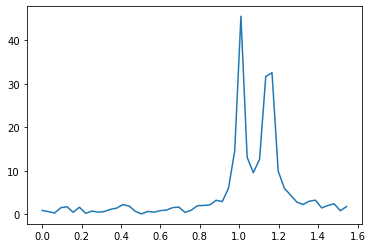

In [14]:
from scipy.fft import fft, fftfreq
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]
plt.plot(f, abs(y))


## Linear Algebra
### Triangular matrix system solution:

In [25]:
from scipy.linalg import solve_triangular
a = np.random.rand(4,4)
a = np.tril(a)
x_true = np.random.rand(4,1)
b = np.dot(a, x_true)


x_est = solve_triangular(a, b, lower=True)
print(x_true.flatten())
print(x_est.flatten())

[0.8412449  0.69518873 0.0287197  0.67069472]
[0.8412449  0.69518873 0.0287197  0.67069472]


### Toeplitz matrices (with constant diagonals).
A Toeplitz matrix can be specified uniquely by its first column and first row. So, to solve a system Ax=b where A is a Toeplitz, we need only to input the first row and column.

In [30]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10]) # first column of A
r = np.array([1, -1, -2, -3])# first row of A
b = np.array([1, 2, 2, 5])
x = solve_toeplitz((c, r), b)
print(x)

[ 1.66666667 -1.         -2.66666667  2.33333333]


### Eigendecomposition of tridiagonal matrices

In [40]:
from scipy.linalg import eigh_tridiagonal

# Create a Toeplitz tridiagonal matrix (three diagonals with constant elements)
d = 3*np.ones(4) # main diagonal elements
e = -1*np.ones(3) # off-diagonal elements
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1) 
print(A)


w, v = eigh_tridiagonal(d, e)
print(w)
print(v.T)
print(v.T[0]) # first eigenvector

# check if eigenvectors are computed and extracted correctly
print(A@v.T[1])
print(w[1]*v.T[1])

[[ 3. -1.  0.  0.]
 [-1.  3. -1.  0.]
 [ 0. -1.  3. -1.]
 [ 0.  0. -1.  3.]]
[1.38196601 2.38196601 3.61803399 4.61803399]
[[ 0.37174803  0.60150096  0.60150096  0.37174803]
 [ 0.60150096  0.37174803 -0.37174803 -0.60150096]
 [ 0.60150096 -0.37174803 -0.37174803  0.60150096]
 [-0.37174803  0.60150096 -0.60150096  0.37174803]]
[0.37174803 0.60150096 0.60150096 0.37174803]
[ 1.43275483  0.88549118 -0.88549118 -1.43275483]
[ 1.43275483  0.88549118 -0.88549118 -1.43275483]


### LU Decomposition

In [42]:
from scipy.linalg import lu
A = np.random.rand(4,4)
p, l, u = lu(A)
print(l)

[[ 1.          0.          0.          0.        ]
 [ 0.65971294  1.          0.          0.        ]
 [ 0.39935435  0.45857902  1.          0.        ]
 [ 0.51412098 -0.73703006  0.66075288  1.        ]]


### Cholesky Decomposition

In [49]:
from scipy.linalg import cholesky
A = np.array([[1, .2],[.2, 1]])
C = cholesky(A, lower=True)
print(C)

[[1.        0.       ]
 [0.2       0.9797959]]


### Sparse Matrices

In [59]:
from scipy.linalg import kron # kronecker product (not sum)
N = 5
d = -2*np.ones(N)
d = np.ones(N-1)
D = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)
D_kronsum = kron(D, np.identity(N)) + kron(np.identity(N), D)

# The size of D_kronsum is N^2 x N^2 for N=100, it will be 1e4 x 1e4 which is too big for any calculations.


from scipy import sparse
N = 100
diag = np.ones(N)
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N)
D
sparse.kronsum(D, D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

## Statistics
1. $\beta$ distribution

0.44642857142857145 0.03744395485466914 0.14570980275128334 -0.6695305405298693


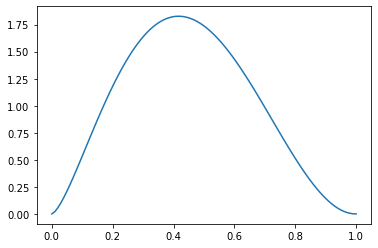

In [78]:
from scipy.stats import beta
a, b = 2.5, 3.1
mean, var, skew, kurt = beta.stats(a, b, moments="mvsk")
print(mean, var, skew, kurt)

# PPF is the inverse of CDF that gives certain values that correspond to values less than the CDF %
x = np.linspace(beta.ppf(0, a, b), beta.ppf(1, a, b), 100)
plt.plot(x,beta.pdf(x, a, b))

2. Gaussian distribution

1.0


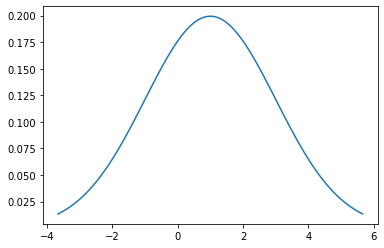

In [77]:
from scipy.stats import norm
mu = 1
sigma = 2
mean, var = norm.stats(loc=mu, scale=sigma, moments="mv")
print(mean)

x = np.linspace(norm.ppf(0.01, mu, sigma), norm.ppf(0.99, mu, sigma), 100)
plt.plot(x, norm.pdf(x, mu, sigma))

3. Multinomial distribution

In [84]:
from scipy.stats import multinomial

# rolling a die
p = np.ones(6)/6
rolls = [6,0,0,0,0,0] # rolling 1 six times in a row
multinomial.pmf(rolls, n=6, p=p)

# Generating random numbers from multinomial distribution
multinomial.rvs(n=100, p=p, size=1) # size is the number of trials each with n number of rolls
# the result gives the frequencies

array([[13, 18, 15, 17, 16, 21]])

4. Defining and producing numbers from your own distribution

In [86]:
import scipy.stats as st

class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
my_rv = mr_p_solver_dist(a=0, b=np.inf)

In [87]:
a1, a2, b1, b2 = 2, 3, 1, 2
x = np.linspace(my_rv.ppf(0.01, a1, a2, b1, b2), my_rv.ppf(0.99, a1, a2, b1, b2), 100)
y = my_rv.pdf(x, a1, a2, b1, b2)

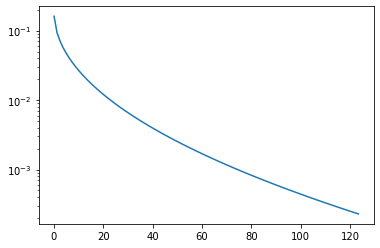

In [91]:
plt.plot(x, y)
plt.semilogy()
plt.show()

In [88]:
my_rv.rvs(a1, a2, b1, b2, size=10)
my_rv.rvs(a1, a2, b1, b2, size=10)


array([13.48216086, 32.32993563,  8.85900757, 28.93870541,  0.36743752,
       19.10808887,  0.1905901 ,  3.94915032, 14.77079728, 17.40590119])

In [89]:
class mr_p_solver_dist(st.rv_continuous):
    def _pdf(self,x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))*(b1*np.exp(-np.sqrt(x/a1)) + b2*np.exp(-np.sqrt(x/a2)))
    def _cdf(self, x, a1, a2, b1, b2):
        return 1/(2*(a1*b1+a2*b2))* ( -2*a1*b1*(np.sqrt(x/a1)+1)*np.exp(-np.sqrt(x/a1)) \
           -2*a2*b2*(np.sqrt(x/b2)+1)*np.exp(-np.sqrt(x/b2)) \
           + 2*a1*b1 + 2*a2*b2 )
    def _rvs(self, a1, a2, b1, b2, delta=0.001, size=None, random_state=None):
        a_min = min([a1, a2])
        x = np.linspace(0, a_min*np.log(1/delta)**2, 10000)
        r = np.random.rand(size)
        return x[np.searchsorted(self._cdf(x[:-1], a1, a2, b1, b2), r)]

In [90]:
my_rv = mr_p_solver_dist(a=0, b=np.inf)
my_rv._rvs(a1, a2, b1, b2, size=10000)

array([ 5.1062385 ,  5.13487162,  3.77002656, ..., 13.43847442,
        3.59822788,  2.39563713])